# **Web Scraping & Data Handling Challenge**

### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

# **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

In [ ]:
url = "https://www.justwatch.com/in/movie/stree-2"

In [ ]:
soup = fetch_movie_urls(url)

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

### **Scrapping Movies Data**

In [ ]:
# Scrape Movie Data

# Function for fetching urls using requests and BeautifulSoup
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000' # url of website we are scraping
soup=fetch_movie_urls(url) # parsed content

### **Fetching Movie URL's**

In [ ]:
#Fetching movie URL's

movie_links = soup.find_all("a", href = True)
movie_urls = [link["href"] for link in movie_links if "/movie/" in link["href"]]
url_list = []

for link in movie_urls:
  url_list.append("https://www.justwatch.com"+link) # Fetching each movie's specific url

In [ ]:
# Testing the fetched content
print(url_list[25])
print(len(url_list))

https://www.justwatch.com/in/movie/deadpool
110


### **Scrapping Movie Title**

In [ ]:
# scrap movie title
import time

Title = []
soup_sub = []
for url in url_list:
  soup = fetch_movie_urls(url) # Fetching soup using existing function created
  if soup:
    soup_sub.append(soup) # storing soup for further use
    name = soup.find("title").text.split(" streaming")[0] # Finding each movie title
    Title.append(name)
    time.sleep(3) # pausing 3 seconds to avoid making requests in short tine

In [ ]:
# Testing fetched data
print(Title[25])
print(len(Title))

Inside Out 2
110


In [ ]:
url = https://www.justwatch.com/in/movie/stree-2
request =

### **Scrapping release Year**

In [ ]:
# scrape release year
Release_Year = []
for soup in soup_sub:
    year = soup.find("span", class_="release-year").text.split("(")[1] # Fetching year data from desired http parsed data
    year = year.split(")")[0] # removing unwanted characters
    Release_Year.append(int(year))

In [ ]:
# Testing data fetched
print(Release_Year[25])
print(len(Release_Year))

2024
110


### **Scrapping Genres**

In [ ]:
# scrape Genres

Genres = []
for soup in soup_sub:
    genre_raw = soup.find("div", class_="title-info title-info") # Fetching sub soup
    genre = list(genre_raw)[1].text.replace("Genres", "") # Extracting genre from sub soup
    Genres.append(str(genre))

In [ ]:
# Testing data fetched
print(Genres[25])
print(len(Genres))

Comedy, Drama, Kids & Family, Fantasy, Animation
110


### **Scrapping IMBD Rating**

In [ ]:
# Scrape imdb rating

IMDB_Rating = []
for soup in soup_sub:
    imdb = soup.find("span", class_="imdb-score") # extracting imdb rating from parsed html
    if imdb: # condition for handling missing values
      imdb = imdb.text.split(" ")[0] # removing unwanted characters
      IMDB_Rating.append(imdb)
    else:
      IMDB_Rating.append(np.nan)

In [ ]:
# Testing data fetched
print(IMDB_Rating[25])
print(len(IMDB_Rating))

7.7
110


### **Scrapping Runtime/Duration**

In [ ]:
# scrape Runtime

Runtime = []

for soup in soup_sub:
  runtime_raw = soup.find("div", class_="title-info title-info") # Fetching sub soup
  runtime = list(runtime_raw)[2].text.replace("Runtime", "") # Extracting runtime from sub soup
  Runtime.append(runtime)

In [ ]:
# Testing data fetched
print(Runtime[25])
print(len(Runtime))

1h 48min
110


### **Scrapping Age Rating**

In [ ]:
# scraping age rating

Age_Rating = []

for soup in soup_sub:
  age_rating_raw = soup.find("div", class_="title-info title-info") # Fetching sub soup

  age_rating = list(age_rating_raw)[3].text.replace("Age rating", "")
  if age_rating != "":
    Age_Rating.append(age_rating)
  else:
    Age_Rating.append(np.nan)

In [ ]:
# Testing data fetched
print(Age_Rating[25])
print(len(Age_Rating))

U
110


In [ ]:
soup = fetch_movie_urls(url_list[25])
runtime_raw = soup.find("div", class_="title-info title-info") # Fetching sub soup
runtime = list(runtime_raw)[4].text.replace("Age rating", "") # Extracting runtime from sub soup
print(runtime)

 Production country United States


### **Fetching Production Countries Details**

In [ ]:
# Fetching Production Countries

Production_Country = []

for soup in soup_sub:
  production_country_raw = soup.find("div", class_="title-info title-info") # Fetching sub soup
  production_country = list(production_country_raw)[4].text.replace("Production country ", "").strip() # extracting production country
  Production_Country.append(production_country)

In [ ]:
# Testing data fetched
print(Production_Country[25])
print(len(Production_Country))

United States
110


### **Fetching Streaming Service Details**

In [ ]:
# Fetching Streaming Service Details

Streaming_Service = []

for soup in soup_sub:
  streaming_raw = soup.find_all("span", class_="offer-container") # Fetching streaming service detail
  set1 = set()
  for item in streaming_raw:
    if item.find("button").text != "Buy tickets": # conditional statement for removing movies running in cinemas
      set1.add(item.find("img")["alt"])
  if len(set1) != 0:
    Streaming_Service.append(", ".join(set1))
  else:
    Streaming_Service.append(np.nan)

In [ ]:
# Testing data fetched
print(Streaming_Service[25])
print(len(Streaming_Service))

Apple TV
110


### **Now Creating Movies DataFrame**

In [ ]:
# creating Movies dataframe using fetched data

Movie_df = pd.DataFrame({
    "Title":Title,
    "Release_Year":Release_Year,
    "Genres":Genres,
    "IMDB_Rating":IMDB_Rating,
    "Runtime":Runtime,
    "Age_Rating":Age_Rating,
    "Production_Country":Production_Country,
    "Streaming_Services":Streaming_Service,
    "URL":url_list
})

In [ ]:
Movie_df.head()

,Title,Release_Year,Genres,IMDB_Rating,Runtime,Age_Rating,Production_Country,Streaming_Services,URL
0,Stree 2,2024,"Comedy, Horror",7.7,2h 27min,UA,India,NaN,https://www.justwatch.com/in/movie/stree-2
1,Kalki 2898-AD,2024,"Science-Fiction, Drama, Action & Adventure, Fa...",7.2,2h 56min,UA,India,"Amazon Video, Amazon Prime Video, Netflix",https://www.justwatch.com/in/movie/project-k
2,Munjya,2024,"Comedy, Horror",6.6,2h 3min,UA,India,Hotstar,https://www.justwatch.com/in/movie/munjha
3,Kill,2024,"Action & Adventure, Crime, Drama, Mystery & Th...",7.6,1h 45min,A,India,NaN,https://www.justwatch.com/in/movie/kill-2024
4,Stree,2018,"Horror, Comedy, Drama",7.5,2h 7min,UA,India,"Hotstar, Apple TV",https://www.justwatch.com/in/movie/stree


### **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url = "https://www.justwatch.com/in/tv-shows?release_year_from=2000"
soup = fetch_movie_urls(tv_url) # parsing
print(soup.prettify()) # printing prettified HTML content

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

### **Fetching Tv shows Url details**

In [ ]:
#Fetching Tv show URL's

tv_show_list = soup.find_all("a", href = True)
tv_show_urls = [link["href"] for link in tv_show_list if "/tv-show/" in link["href"]]
tv_url_list = []

for link in tv_show_urls:
  tv_url_list.append("https://www.justwatch.com"+link) # Fetching each movie's specific url

In [ ]:
# Testing scraped data
print(tv_url_list[25])
print(len(tv_url_list))

https://www.justwatch.com/in/tv-show/farzi
110


### **Fetching Tv Show Title details**

In [ ]:
# scrap Tv show title
import time

Tv_show_title = []
soup_sub1 = []
for url in tv_url_list:
  soup = fetch_movie_urls(url) # Fetching soup using existing function created
  if soup:
    soup_sub1.append(soup) # storing soup for further use
    name = soup.find("title").text
    if "- watch" in name: # condition for seperating titles with different adjusent characters
      name = name.split(" - watch")[0] # Finding each movie title
      Tv_show_title.append(name)
    elif "- streaming" in name:
      name = name.split(" - streaming")[0]
      Tv_show_title.append(name)
    time.sleep(3) # pausing 3 seconds to avoid making requests in short tine

In [ ]:
# testing fetched data
print(Tv_show_title[25])
print(len(Tv_show_title))

Farzi
110


### **Fetching Release Year**

In [ ]:
# Fetching Release Year

Release_year = []
for soup in soup_sub1:
  year = soup.find("span", class_="release-year").text.replace("(", "").replace(")", "") # Fetching year data from desired http parsed data
  Release_year.append(year)

In [ ]:
# testing fetched data
print(Release_year[25])
print(len(Release_year))

2023
110


### **Fetching TV Show Genre Details**

In [ ]:
# Fetching TV Show Genre Details

Tv_show_genre = []
for soup in soup_sub1:
  genre_raw = soup.find("div", class_="title-info title-info") # Fetching sub soup
  genre = list(genre_raw)[1].text.replace("Genres", "") # Extracting genre from sub soup
  Tv_show_genre.append(genre)

In [ ]:
# Testing fetched data
print(Tv_show_genre[25])
print(len(Tv_show_genre))

Crime, Drama, Mystery & Thriller
110


### **Fetching IMDB Rating Details**

In [ ]:
# Scrape imdb rating

IMDB_Rating = []
for soup in soup_sub1:
    imdb = soup.find("span", class_="imdb-score") # extracting imdb rating from parsed html
    if imdb: # condition for handling missing values
      imdb = imdb.text.split(" ")[0] # removing unwanted characters
      IMDB_Rating.append(imdb)
    else:
      IMDB_Rating.append(np.nan)

In [ ]:
# Testing fetched data
print(IMDB_Rating[25])
print(len(IMDB_Rating))

8.4
110


### **Fetching Age Rating Details**

In [ ]:
# scraping age rating

Age_Rating = []

for soup in soup_sub1:
  age_rating_raw = soup.find("div", class_="title-info title-info") # Fetching sub soup

  age_rating = list(age_rating_raw)[3].text.replace("Age rating", "") # Removing unwanted texts
  if age_rating != "":
    Age_Rating.append(age_rating)
  else:
    Age_Rating.append(np.nan)

In [ ]:
# Testing fetched data
print(Age_Rating[25])
print(len(Age_Rating))

nan
110


In [ ]:
print(Age_Rating)

['A', nan, 'A', 'A', nan, nan, 'U', 'A', nan, 'UA', nan, nan, nan, nan, nan, nan, nan, nan, 'A', nan, nan, nan, nan, nan, nan, nan, 'A', nan, nan, nan, nan, 'U', nan, nan, nan, 'U', 'A', nan, nan, nan, nan, nan, nan, 'A', nan, nan, nan, 'A', nan, nan, nan, 'U', nan, 'A', nan, 'A', nan, nan, 'A', 'U', 'A', nan, 'A', nan, nan, nan, nan, nan, nan, 'A', 'A', 'UA', 'A', 'UA', nan, 'U', 'U', 'U', 'U', nan, nan, nan, 'A', nan, 'U', 'A', 'A', nan, nan, 'A', nan, nan, 'A', nan, 'U', 'U', 'U', nan, nan, 'A', 'A', nan, 'A', 'A', nan, nan, nan, nan, nan, nan]


### **Fetching Production Country details**

In [ ]:
# Fetching Production Countries

Production_Country = []

for soup in soup_sub1:
  production_country_raw = soup.find("div", class_="title-info title-info") # Fetching sub soup
  production_country = list(production_country_raw)[4].text.replace("Production country ", "").strip() # extracting production country
  Production_Country.append(production_country)

In [ ]:
# Testing scraped data
print(Production_Country[25])
print(len(Production_Country))

India
110


### **Fetching Streaming Service details**

In [ ]:
# Fetching Streaming Service Details

Streaming_Service = []

for soup in soup_sub1:
  streaming_raw = soup.find("img", class_="offer__icon") # Fetching streaming service detail
  if streaming_raw: # Handling missing values
    Streaming_Service.append(streaming_raw["alt"])
  else:
    Streaming_Service.append(np.nan)

In [ ]:
# Testing scraped data
print(Streaming_Service[25])
print(len(Streaming_Service))

Amazon Prime Video
110


### **Fetching Duration Details**

In [ ]:
# scrape Runtime

Runtime = []

for soup in soup_sub1:
  runtime_raw = soup.find("div", class_="title-info title-info") # Fetching sub soup
  runtime = list(runtime_raw)[2].text.replace("Runtime", "") # Extracting runtime from sub soup
  Runtime.append(runtime)

In [ ]:
# Testing scraped data
print(Runtime[25])
print(len(Runtime))

56min
110


### **Creating TV Show DataFrame**

In [ ]:
# creating TV Show dataframe using fetched data

Tv_Show_df = pd.DataFrame({
    "Title":Tv_show_title,
    "Release_Year":Release_year,
    "Genres":Tv_show_genre,
    "IMDB_Rating":IMDB_Rating,
    "Runtime":Runtime,
    "Age_Rating":Age_Rating,
    "Production_Country":Production_Country,
    "Streaming_Services":Streaming_Service,
    "URL":tv_url_list
})

In [ ]:
Tv_Show_df.head()

,Title,Release_Year,Genres,IMDB_Rating,Runtime,Age_Rating,Production_Country,Streaming_Services,URL
0,Mirzapur,2018,"Action & Adventure, Drama, Crime, Mystery & Th...",8.4,50min,A,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/mirzapur
1,Adam's Sweet Agony,2024,Animation,NaN,3min,NaN,Japan,Amazon Prime Video,https://www.justwatch.com/in/tv-show/adams-swe...
2,Gyaarah Gyaarah,2024,"Drama, Fantasy, Science-Fiction",8.3,43min,A,India,Zee5,https://www.justwatch.com/in/tv-show/gyaarah-g...
3,House of the Dragon,2022,"Action & Adventure, Science-Fiction, Drama, Fa...",8.4,1h 3min,A,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/house-of-...
4,Shekhar Home,2024,"Crime, Drama",8.2,42min,NaN,India,Jio Cinema,https://www.justwatch.com/in/tv-show/shekhar-home


# **Task 2 :- Data Filtering & Analysis**

In [ ]:
# combining two dataframes
final_df = pd.concat([Movie_df, Tv_Show_df])

In [ ]:
final_df

,Title,Release_Year,Genres,IMDB_Rating,Runtime,Age_Rating,Production_Country,Streaming_Services,URL
0,Stree 2,2024,"Comedy, Horror",7.7,2h 27min,UA,India,NaN,https://www.justwatch.com/in/movie/stree-2
1,Kalki 2898-AD,2024,"Science-Fiction, Drama, Action & Adventure, Fa...",7.2,2h 56min,UA,India,"Amazon Video, Amazon Prime Video, Netflix",https://www.justwatch.com/in/movie/project-k
2,Munjya,2024,"Comedy, Horror",6.6,2h 3min,UA,India,Hotstar,https://www.justwatch.com/in/movie/munjha
3,Kill,2024,"Action & Adventure, Crime, Drama, Mystery & Th...",7.6,1h 45min,A,India,NaN,https://www.justwatch.com/in/movie/kill-2024
4,Stree,2018,"Horror, Comedy, Drama",7.5,2h 7min,UA,India,"Hotstar, Apple TV",https://www.justwatch.com/in/movie/stree
...,...,...,...,...,...,...,...,...,...
105,FBI: International Season 4,2024,"Crime, Drama, Mystery & Thriller, Action & Adv...",6.5,43min,NaN,United States,NaN,https://www.justwatch.com/in/tv-show/fbi-inter...
106,Call Me Bae Season 1,2024,"Romance, Drama",NaN,39min,NaN,India,NaN,https://www.justwatch.com/in/tv-show/call-me-b...
107,Selling Sunset Season 8,2024,Reality TV,6.6,35min,NaN,United States,NaN,https://www.justwatch.com/in/tv-show/selling-s...
108,Hot Wheels Let's Race Season 2,2024,"Kids & Family, Science-Fiction, Sport, Animati...",6.5,24min,NaN,United States,NaN,https://www.justwatch.com/in/tv-show/hot-wheel...


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 109
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               220 non-null    object
 1   Release_Year        220 non-null    object
 2   Genres              220 non-null    object
 3   IMDB_Rating         212 non-null    object
 4   Runtime             220 non-null    object
 5   Age_Rating          119 non-null    object
 6   Production_Country  220 non-null    object
 7   Streaming_Services  192 non-null    object
 8   URL                 220 non-null    object
dtypes: object(9)
memory usage: 25.3+ KB


In [ ]:
final_df.describe()

,Title,Release_Year,Genres,IMDB_Rating,Runtime,Age_Rating,Production_Country,Streaming_Services,URL
count,220,220,220,212,220,119,220,192,220
unique,210,36,146,52,104,3,33,48,210
top,Stree 2,2024,Drama,7.7,43min,A,India,Netflix,https://www.justwatch.com/in/movie/stree-2
freq,2,71,13,12,12,49,91,44,2


In [ ]:
final_df["Release_Year"] = final_df["Release_Year"].astype(int)
final_df["IMDB_Rating"] = final_df["IMDB_Rating"].astype(float)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 109
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               220 non-null    object 
 1   Release_Year        220 non-null    int64  
 2   Genres              220 non-null    object 
 3   IMDB_Rating         212 non-null    float64
 4   Runtime             220 non-null    object 
 5   Age_Rating          119 non-null    object 
 6   Production_Country  220 non-null    object 
 7   Streaming_Services  192 non-null    object 
 8   URL                 220 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 25.3+ KB


### **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# calculating mean IMDB ratings

mean_IMDB = final_df.IMDB_Rating.mean()
print(f"Mean IMDB rating for both Movies and Tv shows is {mean_IMDB}")

Mean IMDB rating for both Movies and Tv shows is 7.339622641509434


### **Analyzing Top Genres**

In [ ]:
# Finding main genre for each movie and shows
genre_list = []
for genre in final_df["Genres"]:
  genre = genre.split(", ")[0]
  genre_list.append(genre)

# Creating main genre column in data frame for finding popular genre
final_df["Main_Genres"] = genre_list

In [ ]:
final_df.head()

,Title,Release_Year,Genres,IMDB_Rating,Runtime,Age_Rating,Production_Country,Streaming_Services,URL,Main_Genres
0,Stree 2,2024,"Comedy, Horror",7.7,2h 27min,UA,India,NaN,https://www.justwatch.com/in/movie/stree-2,Comedy
1,Kalki 2898-AD,2024,"Science-Fiction, Drama, Action & Adventure, Fa...",7.2,2h 56min,UA,India,"Amazon Video, Amazon Prime Video, Netflix",https://www.justwatch.com/in/movie/project-k,Science-Fiction
2,Munjya,2024,"Comedy, Horror",6.6,2h 3min,UA,India,Hotstar,https://www.justwatch.com/in/movie/munjha,Comedy
3,Kill,2024,"Action & Adventure, Crime, Drama, Mystery & Th...",7.6,1h 45min,A,India,NaN,https://www.justwatch.com/in/movie/kill-2024,Action & Adventure
4,Stree,2018,"Horror, Comedy, Drama",7.5,2h 7min,UA,India,"Hotstar, Apple TV",https://www.justwatch.com/in/movie/stree,Horror


In [ ]:
# Finding Top genres

top_5_genres = final_df["Main_Genres"].value_counts().head()
print(f"Top 5 genres are \n \n {top_5_genres}") # printing top 5 genres used \n for seperating extra text from result

Top 5 genres are 
 
 Main_Genres
Drama                 65
Action & Adventure    35
Comedy                31
Mystery & Thriller    19
Crime                 17
Name: count, dtype: int64


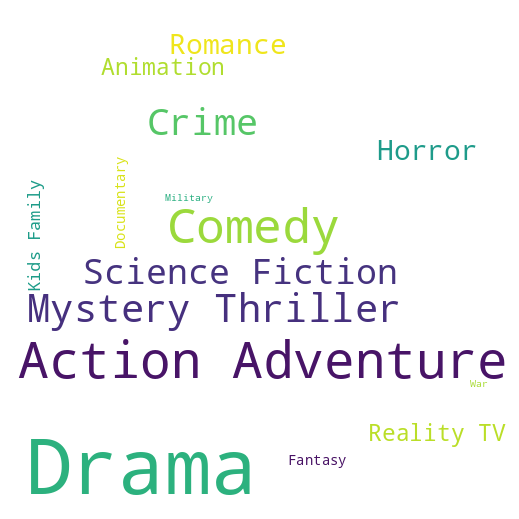

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_genres = " ".join(genres for genres in final_df["Main_Genres"])
wordcloud = WordCloud(width = 500, height = 500, background_color = "white", min_font_size = 10).generate(all_genres)
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### **Finding Predominant Streaming Service**

In [ ]:
# Finding main streaminmg service for each movie and shows
streaming_service_list = []
sss = final_df.iloc[2:5, 5:10]
for ss in final_df["Streaming_Services"]:
  if pd.isna(ss):
        streaming_service_list.append(np.nan)
  else:
    stream = ss.split(", ")[0]
    streaming_service_list.append(stream)

# Creating main genre column in data frame for finding popular genre
final_df["Main_Streaming_Services"] = streaming_service_list


In [ ]:
# Finding Top streaming services

top_5_streaming_services = final_df["Main_Streaming_Services"].value_counts().head()
print(f"Top 5 streaming services are \n \n {top_5_streaming_services}") # printing top 5 genres used \n for seperating extra text from result

Top 5 streaming services are 
 
 Main_Streaming_Services
Netflix               45
Amazon Prime Video    42
Hotstar               24
Jio Cinema            23
Amazon Video          21
Name: count, dtype: int64


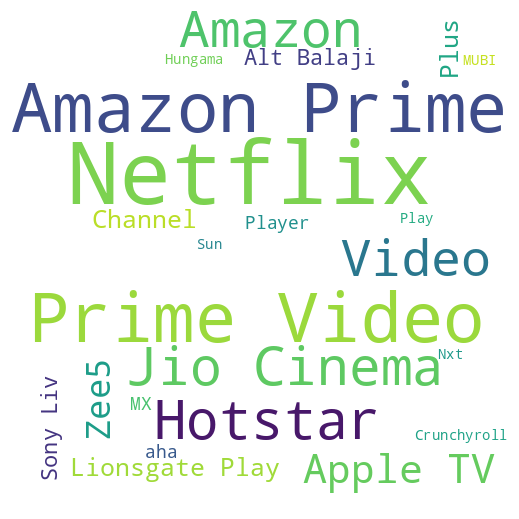

In [ ]:
#Let's Visvalize it using word cloud

all_Streaming_Services = " ".join(streaming_services for streaming_services in final_df["Main_Streaming_Services"] if not pd.isna(streaming_services))
wordcloud = WordCloud(width = 500, height = 500, background_color = "white", min_font_size = 10).generate(all_Streaming_Services)
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
Final_Data = final_df.to_csv("Final Data.csv", index = True)

In [ ]:
#saving filter data as Filter Data in csv format
Filter_Data = final_df.to_csv("Filter Data.csv", index = True)